In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

## Loading the data

### Track coordinates

In [2]:
track = pd.read_csv('data/CA1_6_1_track.csv', header=None) # coordinates
track.columns = ['time', 'x', 'y']
track.set_index('time', inplace=True)
track.index = (track.index * 20).astype(np.int32)
track.head()

,x,y
time,,
1,-10.618986,1.045508
2,-11.600195,1.371564
3,-12.577124,1.717142
4,-13.551862,2.083993
5,-14.512914,2.497923


### Neuropil

In [3]:
neuropil = pd.read_csv('data/CA1_6_1_neuropil.csv', header=None, index_col=0) # neurons
neuropil.index.names = ['time']
neuropil.index = (neuropil.index * 20).astype(np.int32)

# making it match fine_cells
neuropil.columns = (neuropil.columns - 1).astype(str) + 'N' # to differentiate it from a number

# aligning the rows to match track and fine_cells
neuropil = neuropil.loc[647:, :].reset_index()
neuropil['time'] = neuropil['time'] - 646
neuropil.set_index('time', inplace=True)

neuropil.head()

,0N,1N,2N,3N,4N,5N,6N,7N,8N,9N,...,580N,581N,582N,583N,584N,585N,586N,587N,588N,589N
time,,,,,,,,,,,,,,,,,,,,,
1,-0.002934,-0.002239,0.000845,-0.000191,0.018179,0.002266,-0.001677,-0.000652,-0.002532,-0.005300,...,0.009806,-0.003243,-0.002325,-0.000460,0.005267,0.008778,0.008849,0.003470,0.001455,-0.002240
2,-0.004061,-0.003564,0.002370,-0.003619,0.017365,-0.000518,-0.001709,-0.004011,-0.004835,-0.002587,...,0.007742,-0.002837,-0.001337,-0.000094,0.003998,0.009368,0.009396,0.003687,-0.001638,-0.001919
3,-0.002164,-0.002635,0.000981,-0.001702,0.017278,0.002372,-0.002508,-0.003894,-0.001754,-0.005893,...,0.005949,-0.001452,-0.000011,-0.000207,0.006297,0.009328,0.006953,0.003336,0.000240,-0.003030
4,-0.003558,-0.005556,0.000519,-0.002884,0.013902,0.003492,-0.002478,-0.004923,-0.004490,-0.003553,...,0.009733,-0.002536,0.001108,0.000418,0.007100,0.011831,0.007619,0.004714,-0.002084,-0.002159
5,-0.004191,-0.003141,0.002763,-0.002097,0.015821,0.006337,0.000688,-0.005050,-0.003774,-0.004155,...,0.007605,-0.003587,-0.000978,-0.000112,0.004959,0.006470,0.007963,0.006876,-0.001403,-0.002426


### Fine (not) cells

In [4]:
fine_cells = pd.read_csv('data/CA1_6_1_fine_cells.csv', index_col=0)
#fine_cells.rename(columns={"time,s\cell#": "time"}, inplace=True)
#fine_cells.set_index('time', inplace=True)
fine_cells.index.names = ['time']
fine_cells.index = (fine_cells.index * 20).astype(np.int32)
fine_cells.columns = fine_cells.columns.astype(str) + 'N'
fine_cells.head()

,4N,69N,92N,116N,123N,128N,136N,143N,147N,153N,...,188N,192N,208N,231N,273N,354N,408N,543N,570N,577N
time,,,,,,,,,,,,,,,,,,,,,
1,0.018179,-0.024777,-0.006565,-0.012388,-0.008887,-0.012914,-0.015549,-0.006735,-0.012197,-0.018785,...,0.009529,-0.001906,0.043256,-0.005412,-0.001835,-0.004913,-0.006586,-0.005296,-0.007407,-0.002616
2,0.017365,-0.022071,-0.006246,-0.013401,-0.006372,-0.013255,-0.017807,-0.006125,-0.013311,-0.018717,...,0.012430,-0.000354,0.042603,-0.005423,-0.003040,-0.003705,-0.006257,-0.005749,-0.007352,-0.003265
3,0.017278,-0.022216,-0.004703,-0.009781,-0.005761,-0.011657,-0.013116,-0.010442,-0.011870,-0.017295,...,0.012656,0.001288,0.041309,-0.003618,-0.000195,-0.001868,-0.005974,-0.005802,-0.004829,-0.003245
4,0.013902,-0.021415,-0.003486,-0.010803,-0.003996,-0.014408,-0.015875,-0.009822,-0.010226,-0.019532,...,0.010340,0.001612,0.043249,-0.006278,-0.001035,-0.006251,-0.006020,-0.005568,-0.006260,-0.003475
5,0.015821,-0.022920,-0.000751,-0.011077,-0.001041,-0.012884,-0.014639,-0.008761,-0.013454,-0.017255,...,0.007611,0.005419,0.039358,-0.004703,-0.001926,-0.006696,-0.008204,-0.004500,-0.004808,-0.002429


### Joining cells data with track

In [5]:
track.shape, neuropil.shape, fine_cells.shape

((6124, 2), (6124, 590), (6124, 24))

In [6]:
df = neuropil.join(track, how='inner')

# WARNING: transposed version
df.head().T

time,1,2,3,4,5
0N,-0.002934,-0.004061,-0.002164,-0.003558,-0.004191
1N,-0.002239,-0.003564,-0.002635,-0.005556,-0.003141
2N,0.000845,0.002370,0.000981,0.000519,0.002763
3N,-0.000191,-0.003619,-0.001702,-0.002884,-0.002097
4N,0.018179,0.017365,0.017278,0.013902,0.015821
...,...,...,...,...,...
587N,0.003470,0.003687,0.003336,0.004714,0.006876
588N,0.001455,-0.001638,0.000240,-0.002084,-0.001403
589N,-0.002240,-0.001919,-0.003030,-0.002159,-0.002426
x,-10.618986,-11.600195,-12.577124,-13.551862,-14.512914


## Auxillary functions

In [7]:
def get_segment(coordinates, cx = 0, cy = 0, n=10):
    """
    Returns a segment of a circle centered at (cx, cy)

    Parameters
    ----------
    coordinates : {x, y}
        coordinates of a point
    cx : float
        x of the circle's center
    cy : float
        y of the circle's center
    n : int
        number of segments

    Returns
    -------
    int
        i-th segment corresponding to the given coordinates

    """
    segment = 360 / n
    return (np.angle((coordinates['x'] - cx) + 1j * (coordinates['y'] - cy), deg=True)+360) % 360 // segment


def acc_1(y_pred, y_true):
    # simple accuracy
    return np.sum(y_pred == y_true) / len(y_true)

# TODO fix
def acc_3(y_pred, y_true, num_segments=10):
    # 3-accuracy
    p = y_pred.astype(int)
    t = y_true.astype(int)
    return np.sum((np.abs(p - t) <= 1.) | (np.abs(p - t) == num_segments-1)) / len(y_true)

In [8]:
from math import pi
from math import cos, sin
def generate_xy(center, radius, n=100):
    """
    returns a list of n coordinates of a circle on xy plane

    Parameters
    ----------
    center : (x, y)
        center of the circle
    radius : float
        radius of the circle
    n : int
        number of points

    Returns
    -------
    list
        coordinates of the circle on xy plane (x, y)

    """
    a = [] # the resulting array
    delta = 2 * pi / n
    angles = np.arange(0, 2 * pi, delta)
    for phi in angles:
        x = radius * cos(phi) + center[0]
        y = radius * sin(phi) + center[1]
        a.append((x, y))
    return a

## Showcasing the functions

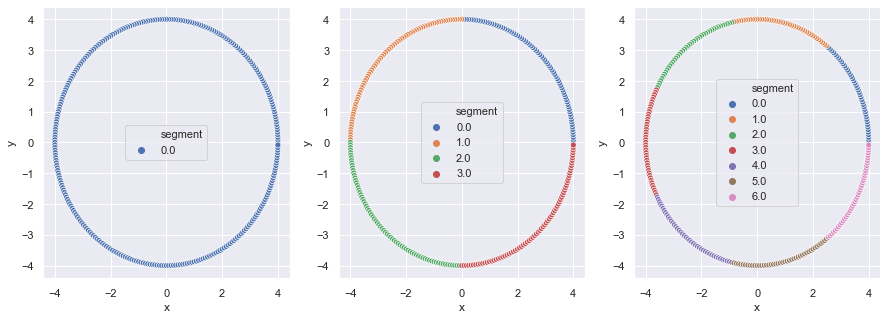

In [9]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=3)


for i in range(1, 10, 3):
    generated_circle = pd.DataFrame(generate_xy((0, 0), 4, n=300),columns=['x','y'])
    generated_circle['segment'] = get_segment(generated_circle, n=i)
    generated_circle['segment'] = generated_circle['segment'].astype('category')
    sns.scatterplot(x='x', y='y', hue='segment', data=generated_circle, ax=ax[(i-1) // 3])

## Getting the coordinates of the circle

In [10]:
x_max, y_max = df[['x', 'y']].max()
x_min, y_min = df[['x', 'y']].min()

radius_x = (x_max - x_min) / 2
radius_y = (y_max - y_min) / 2
radius = (radius_x+radius_y)/2

cx1 = x_max - radius
cx2 = x_min + radius
cx = (cx1 + cx2) / 2
cy1 = y_max - radius
cy2 = y_min + radius
cy = (cy1 + cy2) / 2

## Splitting the circle into segments

In [11]:
NUM_SEGMENTS=10

In [12]:
df['segment'] = get_segment(df, n=NUM_SEGMENTS)
df['segment'] = df['segment'].astype('category') # for better visualization

### Generating a circle

In [13]:
generated_circle = pd.DataFrame(generate_xy((0, 0), 4, n=300),columns=['x','y'])
generated_circle['segment'] = get_segment(generated_circle, n=NUM_SEGMENTS)
generated_circle['segment'] = generated_circle['segment'].astype('category')

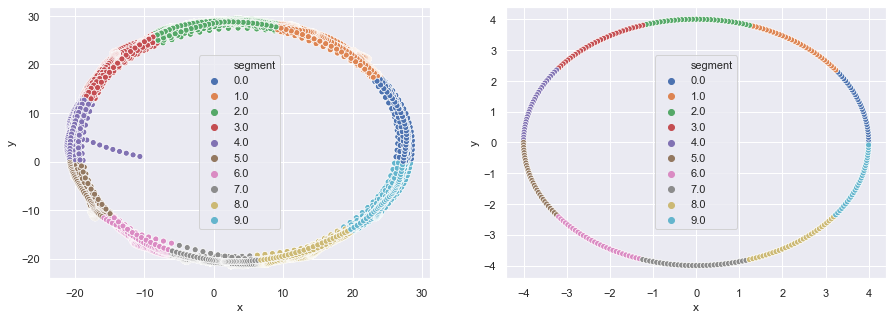

In [14]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)

sns.scatterplot(x='x', y='y', hue='segment', data=df, ax=ax[0])
sns.scatterplot(x='x', y='y', hue='segment', data=generated_circle, ax=ax[1]);

In [15]:
# ??? where did it come from
df[(df['x'] < -10) & (df['x'] > -15) & (df['y'] > 0) & (df['y'] < 5)]

,0N,1N,2N,3N,4N,5N,6N,7N,8N,9N,...,583N,584N,585N,586N,587N,588N,589N,x,y,segment
time,,,,,,,,,,,,,,,,,,,,,
1,-0.002934,-0.002239,0.000845,-0.000191,0.018179,0.002266,-0.001677,-0.000652,-0.002532,-0.005300,...,-0.000460,0.005267,0.008778,0.008849,0.003470,0.001455,-0.002240,-10.618986,1.045508,4.0
2,-0.004061,-0.003564,0.002370,-0.003619,0.017365,-0.000518,-0.001709,-0.004011,-0.004835,-0.002587,...,-0.000094,0.003998,0.009368,0.009396,0.003687,-0.001638,-0.001919,-11.600195,1.371564,4.0
3,-0.002164,-0.002635,0.000981,-0.001702,0.017278,0.002372,-0.002508,-0.003894,-0.001754,-0.005893,...,-0.000207,0.006297,0.009328,0.006953,0.003336,0.000240,-0.003030,-12.577124,1.717142,4.0
4,-0.003558,-0.005556,0.000519,-0.002884,0.013902,0.003492,-0.002478,-0.004923,-0.004490,-0.003553,...,0.000418,0.007100,0.011831,0.007619,0.004714,-0.002084,-0.002159,-13.551862,2.083993,4.0
5,-0.004191,-0.003141,0.002763,-0.002097,0.015821,0.006337,0.000688,-0.005050,-0.003774,-0.004155,...,-0.000112,0.004959,0.006470,0.007963,0.006876,-0.001403,-0.002426,-14.512914,2.497923,4.0


In [16]:
# just dropping that tail
df = df.drop(range(1, 6))
fine_cells = fine_cells.drop(range(1, 6))

## Mutual Information
TODO use simple linear regression?

just use sklearn.feature_selection

In [17]:
from sklearn.metrics import mutual_info_score

### preparing the data

In [18]:
X = df.drop(['x', 'y', 'segment'], axis='columns').copy()
y = df['segment'].copy()

In [19]:
# TODO try different discrete variable
for col in X.columns:
    quantiles = [X[col].quantile(q) for q in np.arange(0, 1, 0.1)]
    batches = np.zeros(len(y)).astype(int)
    for q in quantiles:
        batches += (X[col] - q >= 0)
    X[col] = batches

In [20]:
mis = X.apply(lambda col: mutual_info_score(col, y) / np.log(2), axis=0).copy()
mis = mis.sort_values(ascending=False)

In [21]:
mis = pd.DataFrame({'neuron': mis.index, 'score':mis})
mis['neuron'] = mis['neuron'].astype(str)

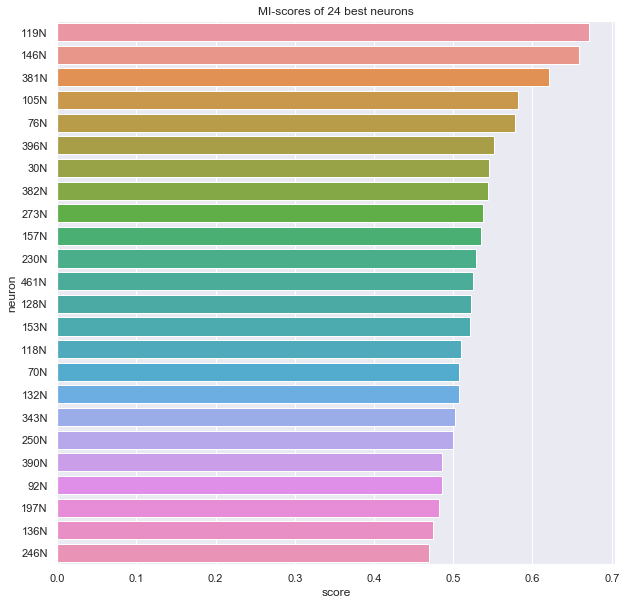

In [22]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1)

ax = sns.barplot(x='score', y='neuron', data=mis[:24], ax=ax);
ax.set_title("MI-scores of 24 best neurons");

### Comparing the obtained neurons with manually selected ones

In [23]:
fine_neurons = fine_cells.columns
mi_best_neurons = mis[:24]['neuron']
mi_worst_neurons = mis[-24:]['neuron']

fine_mi_intersect = set(fine_neurons) & set(mi_best_neurons)
print(f" Intersection with fine({len(fine_mi_intersect)}): {' '.join(fine_mi_intersect)}")

 Intersection with fine(5): 153N 92N 128N 136N 273N


Note: indexing from 0

As you can see, the results reported in Robert's work are fully reproducible

## Feature selection

### Train-test split

#### TODO try different splitting

In [24]:
TRAIN_SIZE=0.7
TRAIN_SIZE_NUM = int(df.shape[0]*TRAIN_SIZE)

In [25]:
train_indeces = df[:int(df.shape[0]*TRAIN_SIZE)].index
test_indeces = df.drop(train_indeces).index

In [26]:
# old
# X = df.copy()
# X['segment'] = X['segment'].astype(int)
# X_train = X.loc[train_indeces]
# X_test = X.loc[test_indeces]
# y_train = X_train['segment']
# y_test = X_test['segment']
# X_train.drop(['segment', 'x', 'y'], axis='columns', inplace=True)
# X_test.drop(['segment', 'x', 'y'], axis='columns', inplace=True)

In [59]:
X = df.copy()
X['segment'] = X['segment'].astype(int)
X_train = X.loc[:TRAIN_SIZE_NUM]
X_test = X.loc[TRAIN_SIZE_NUM:]
y_train = X_train['segment']
y_test = X_test['segment']
X_train.drop(['segment', 'x', 'y'], axis='columns', inplace=True)
X_test.drop(['segment', 'x', 'y'], axis='columns', inplace=True)

/Users/th/Desktop/topology/env/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Catboost features

Idea: train catboost model -> select the most important columns for the model 

Training the model on 70% of the data

In [60]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier(iterations=100,
                           loss_function='MultiClass',
                           eval_metric="Accuracy",
                           verbose=False)

In [61]:
cb_model.fit(X_train, y_train, plot=False, verbose=False);

### Accuracy of GB

In [62]:
y_preds = [
    (cb_model.predict(X_test).reshape(-1), 'GBDT')
]

pd.DataFrame([
    [name, acc_1(y_pred, y_test), acc_3(y_pred, y_test)]
    for y_pred, name in y_preds
], columns=['Name', '1-accuracy', '3-accuracy']).set_index('Name')

,1-accuracy,3-accuracy
Name,,
GBDT,0.592291,0.970684


### Getting feature importances

In [63]:
cbn = pd.DataFrame({"neuron":X_train.columns, "importance": cb_model.get_feature_importance()})
cbn = cbn.sort_values("importance", ascending=False)
cbn = cbn[cbn['importance'] > 0]
cbn.set_index('neuron')
cbn.head(10)

,neuron,importance
123,123N,4.626457
105,105N,4.071605
381,381N,3.840688
461,461N,3.446264
396,396N,3.254047
153,153N,3.099229
295,295N,2.934609
299,299N,2.708958
30,30N,2.255815
454,454N,2.163187


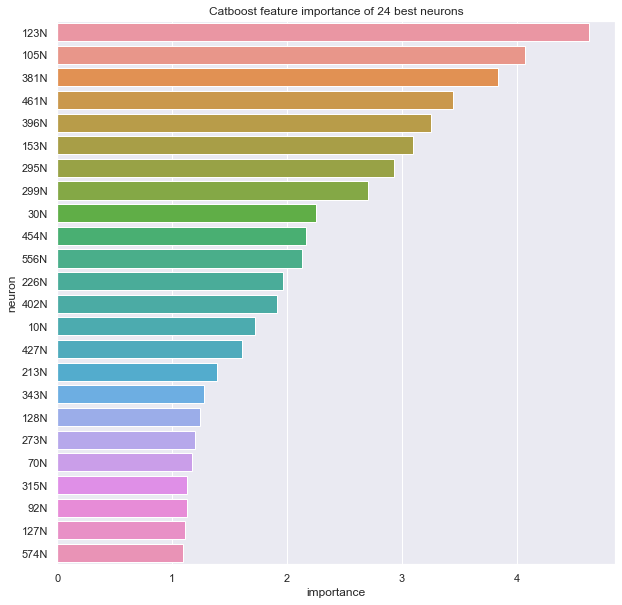

In [64]:
plt.figure(figsize=(10, 10))

ax = sns.barplot(x='importance', y='neuron', data=cbn[:24]);
ax.set_title("Catboost feature importance of 24 best neurons");

### Comparing the obtained neurons with manually selected ones

In [65]:
fine_neurons = fine_cells.columns
cbn_best_neurons = cbn[:24]['neuron']
cbn_worst_neurons = cbn[-24:]['neuron']

fine_cbn_intersect = set(fine_neurons) & set(cbn_best_neurons)
mi_cbn_intersect = set(mi_best_neurons) & set(cbn_best_neurons)
print(f" Intersection with fine({len(fine_cbn_intersect)}): {' '.join(fine_cbn_intersect)}")
print(f" Intersection with mi({len(mi_cbn_intersect)}): {' '.join(mi_cbn_intersect)}")

 Intersection with fine(5): 153N 92N 123N 128N 273N
 Intersection with mi(11): 70N 153N 92N 105N 128N 30N 396N 381N 461N 273N 343N


### using [One-vs.-rest](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest)

In [66]:
from sklearn.multiclass import OneVsRestClassifier
cbovr_model = OneVsRestClassifier(CatBoostClassifier(iterations=100,
                                             loss_function='MultiClass',
                                             eval_metric="Accuracy",
                                             verbose=False)).fit(X_train, y_train)

In [67]:
y_preds = [
    (cbovr_model.predict(X_test).reshape(-1), 'GBDT')
]

pd.DataFrame([
    [name, acc_1(y_pred, y_test), acc_3(y_pred, y_test)]
    for y_pred, name in y_preds
], columns=['Name', '1-accuracy', '3-accuracy']).set_index('Name')

,1-accuracy,3-accuracy
Name,,
GBDT,0.505972,0.966341


Segment 0
	 Intersection with fine(1): 116N
	 Intersection with mi(2): 105N 390N
Segment 1
	 Intersection with fine(1): 176N
	 Intersection with mi(2): 461N 30N
Segment 2
	 Intersection with fine(2): 143N 128N
	 Intersection with mi(3): 461N 128N 381N
Segment 3
	 Intersection with fine(3): 231N 153N 92N
	 Intersection with mi(4): 92N 153N 343N 250N
Segment 4
	 Intersection with fine(2): 231N 153N
	 Intersection with mi(6): 76N 153N 381N 250N 343N 197N
Segment 5
	 Intersection with fine(5): 188N 170N 69N 570N 577N
	 Intersection with mi(4): 461N 70N 343N 381N
Segment 6
	 Intersection with fine(3): 570N 273N 136N
	 Intersection with mi(3): 70N 273N 136N
Segment 7
	 Intersection with fine(2): 192N 123N
	 Intersection with mi(4): 157N 105N 461N 132N
Segment 8
	 Intersection with fine(0): 
	 Intersection with mi(5): 76N 382N 157N 119N 146N
Segment 9
	 Intersection with fine(4): 92N 192N 147N 165N
	 Intersection with mi(2): 230N 92N


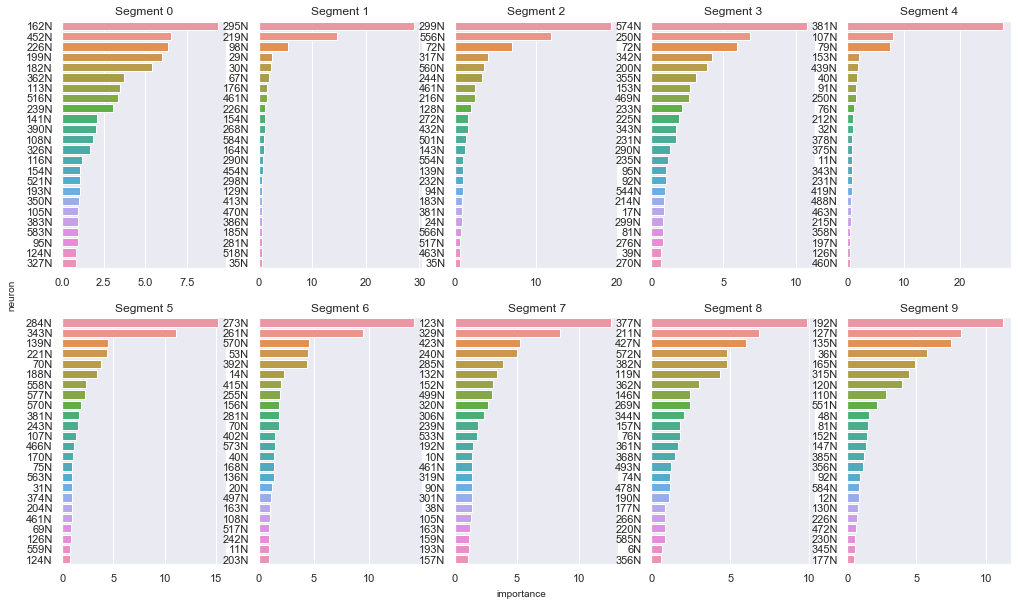

In [68]:
#plt.figure(figsize=(17, 10))
fig, _ = plt.subplots(sharex=True, sharey=True, figsize=(17, 10))
fig.text(0.5, 0.08, 'importance', ha='center')
fig.text(0.08, 0.5, 'neuron', va='center', rotation='vertical')

cbnovr_best_neurons = []

for segment in range(NUM_SEGMENTS):
    plt.subplot(2, 5, segment + 1)
    
    model = cbovr_model.estimators_[segment]
    
    s = pd.DataFrame({"neuron":X_train.columns, "importance": model.get_feature_importance()})
    s = s.sort_values("importance", ascending=False)[:24]
    
    cbnovr_best_neurons.append(s)
    
    ax = sns.barplot(x='importance', y='neuron', data=s);
    ax.set_title(f"Segment {segment}");
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    fine_cbnovr_intersect = set(fine_neurons) & set(s['neuron'])
    mi_cbnovr_intersect = set(mi_best_neurons) & set(s['neuron'])
    print(f"Segment {segment}")
    print(f"\t Intersection with fine({len(fine_cbnovr_intersect)}): {' '.join(fine_cbnovr_intersect)}")
    print(f"\t Intersection with mi({len(mi_cbnovr_intersect)}): {' '.join(mi_cbnovr_intersect)}")

## Simple logistic regression classifier features

### Without normalization

using [One-vs.-rest](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest)

In [69]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, penalty='l2', multi_class='ovr').fit(X_train, y_train)


y_preds = [
    (lr_model.predict(X_test).reshape(-1), 'ovr Logistic regression')
]

pd.DataFrame([
    [name, acc_1(y_pred, y_test), acc_3(y_pred, y_test)]
    for y_pred, name in y_preds
], columns=['Name', '1-accuracy', '3-accuracy']).set_index('Name')

,1-accuracy,3-accuracy
Name,,
ovr Logistic regression,0.686211,0.938111


In [70]:
lrn = pd.DataFrame(lr_model.coef_.T, index=X_train.columns)
lrn.index.names = ['neuron']
lrn = lrn.reset_index()
lrn.head()

,neuron,0,1,2,3,4,5,6,7,8,9
0,0N,-0.102503,0.221471,0.019378,0.010466,-0.026774,0.043279,0.120742,-0.127558,-0.257188,0.056982
1,1N,-0.283008,-0.017021,-0.358504,-0.104628,-0.233189,-0.045322,0.381588,0.852090,0.261301,-0.345171
2,2N,-0.164574,-0.460397,1.837834,1.789312,0.180322,0.283833,-0.642285,0.232138,-0.588479,-0.743952
3,3N,-0.785539,0.861518,1.710148,-0.046959,-0.646613,-0.497909,-0.172191,0.156415,-0.339407,-0.587470
4,4N,-1.004347,0.339167,1.436891,-0.124085,-0.415930,0.753552,0.631395,-0.585074,-0.287138,-0.326846


Segment 0
	 Intersection with fine(4): 116N 153N 128N 136N
	 Intersection with mi(3): 153N 128N 136N
Segment 1
	 Intersection with fine(2): 147N 176N
	 Intersection with mi(0): 
Segment 2
	 Intersection with fine(4): 170N 143N 128N 147N
	 Intersection with mi(5): 76N 382N 381N 128N 343N
Segment 3
	 Intersection with fine(5): 143N 153N 92N 231N 147N
	 Intersection with mi(6): 76N 153N 92N 381N 250N 343N
Segment 4
	 Intersection with fine(4): 231N 153N 92N 136N
	 Intersection with mi(7): 76N 153N 92N 136N 157N 381N 343N
Segment 5
	 Intersection with fine(5): 188N 153N 136N 170N 577N
	 Intersection with mi(6): 70N 153N 136N 30N 381N 343N
Segment 6
	 Intersection with fine(4): 570N 69N 273N 136N
	 Intersection with mi(6): 76N 118N 146N 136N 119N 273N
Segment 7
	 Intersection with fine(1): 69N
	 Intersection with mi(1): 132N
Segment 8
	 Intersection with fine(3): 143N 128N 92N
	 Intersection with mi(7): 118N 92N 146N 382N 157N 119N 128N
Segment 9
	 Intersection with fine(6): 192N 165N 92N 1

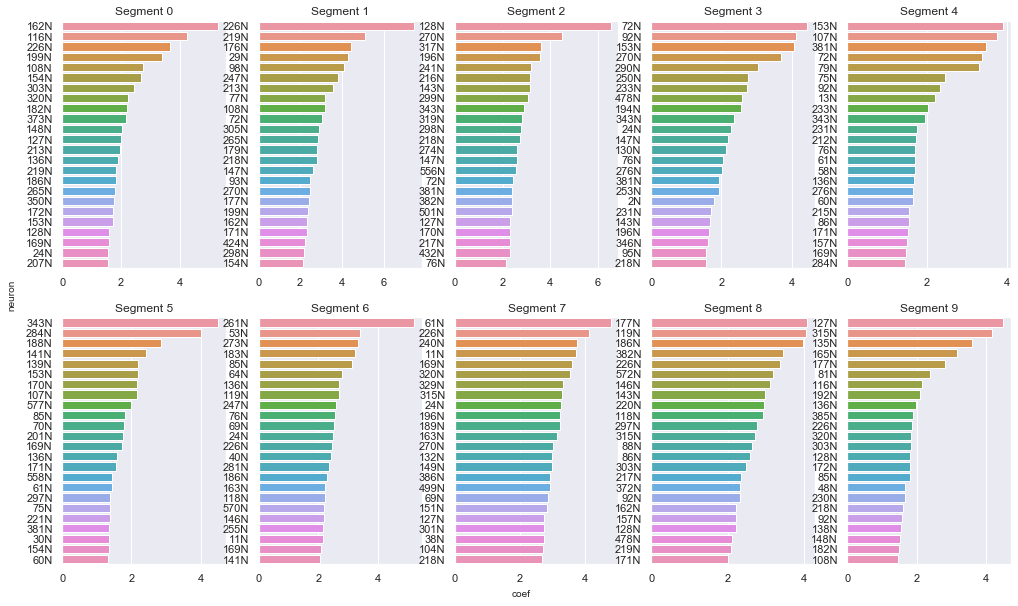

In [71]:
#plt.figure(figsize=(17, 10))
fig, _ = plt.subplots(sharex=True, sharey=True, figsize=(17, 10))
fig.text(0.5, 0.08, 'coef', ha='center')
fig.text(0.08, 0.5, 'neuron', va='center', rotation='vertical')

lr_best_neurons = []

for segment in range(NUM_SEGMENTS):
    plt.subplot(2, 5, segment + 1)
    s = lrn[['neuron', segment]].copy()
    s[segment] = abs(s[segment])
    s = s.sort_values(segment, ascending=False)[:24]
    s.rename(columns = {segment: 'coef'}, inplace = True)
    
    ax = sns.barplot(x='coef', y='neuron', data=s);
    
    
    lr_best_neurons.append(s['neuron'])
    fine_lr_intersect = set(fine_neurons) & set(s['neuron'])
    mi_lr_intersect = set(mi_best_neurons) & set(s['neuron'])
    
    
    ax.set_title(f"Segment {segment}");
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    print(f"Segment {segment}")
    print(f"\t Intersection with fine({len(fine_lr_intersect)}): {' '.join(fine_lr_intersect)}")
    print(f"\t Intersection with mi({len(mi_lr_intersect)}): {' '.join(mi_lr_intersect)}")

### With feature scaling

In [72]:
from sklearn import preprocessing

X = df.copy()
y_train = X[:TRAIN_SIZE_NUM]['segment']
y_test = X[TRAIN_SIZE_NUM:]['segment']

X.drop(['segment', 'x', 'y'], axis='columns', inplace=True)
X_std = preprocessing.scale(X)

X_train = X_std[:TRAIN_SIZE_NUM]
X_test = X_std[TRAIN_SIZE_NUM:]

In [73]:
lr_model = LogisticRegression(random_state=0,
                              penalty='l2', 
                              multi_class='ovr',
                              max_iter=1000).fit(X_train, y_train)


y_preds = [
    (lr_model.predict(X_test).reshape(-1), 'ovr Logistic regression')
]

pd.DataFrame([
    [name, acc_1(y_pred, y_test), acc_3(y_pred, y_test)]
    for y_pred, name in y_preds
], columns=['Name', '1-accuracy', '3-accuracy']).set_index('Name')

,1-accuracy,3-accuracy
Name,,
ovr Logistic regression,0.546296,0.926471


In [74]:
lrn = pd.DataFrame(lr_model.coef_.T, index=X.columns)
lrn.index.names = ['neuron']
lrn = lrn.reset_index()
lrn.head()

,neuron,0,1,2,3,4,5,6,7,8,9
0,0N,-0.191380,0.118278,0.059985,0.182571,-0.135671,-0.208215,0.388355,-0.360575,-0.115568,0.285324
1,1N,-0.076935,0.252922,-0.063984,0.038282,0.184632,-0.211825,0.003728,0.360415,0.091342,-0.065647
2,2N,0.116347,0.022577,-0.075779,0.292240,-0.222338,-0.004926,-0.039233,0.120412,-0.129162,0.124614
3,3N,0.070858,0.356952,0.007102,0.172122,-0.084393,0.117457,-0.028293,0.214671,-0.148261,0.022710
4,4N,-0.465601,0.486124,0.036105,0.186521,-0.291517,0.120911,0.068249,-0.199210,0.072366,0.068306


Segment 0
	 Intersection with fine(2): 4N 123N
	 Intersection with mi(1): 390N
Segment 1
	 Intersection with fine(2): 4N 176N
	 Intersection with mi(2): 461N 390N
Segment 2
	 Intersection with fine(3): 170N 143N 128N
	 Intersection with mi(1): 128N
Segment 3
	 Intersection with fine(0): 
	 Intersection with mi(1): 250N
Segment 4
	 Intersection with fine(2): 188N 231N
	 Intersection with mi(1): 381N
Segment 5
	 Intersection with fine(1): 570N
	 Intersection with mi(1): 70N
Segment 6
	 Intersection with fine(3): 570N 273N 354N
	 Intersection with mi(1): 273N
Segment 7
	 Intersection with fine(1): 354N
	 Intersection with mi(1): 132N
Segment 8
	 Intersection with fine(2): 92N 123N
	 Intersection with mi(2): 146N 92N
Segment 9
	 Intersection with fine(1): 192N
	 Intersection with mi(0): 


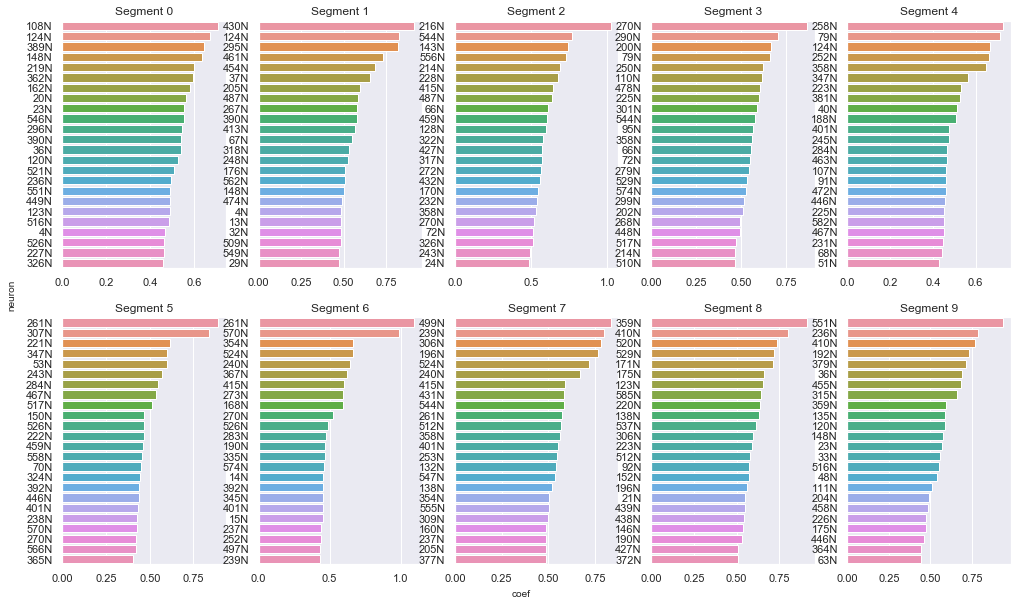

In [75]:
#plt.figure(figsize=(17, 10))
fig, _ = plt.subplots(sharex=True, sharey=True, figsize=(17, 10))
fig.text(0.5, 0.08, 'coef', ha='center')
fig.text(0.08, 0.5, 'neuron', va='center', rotation='vertical')

lrovr_best_neurons = []

for segment in range(NUM_SEGMENTS):
    plt.subplot(2, 5, segment + 1)
    s = lrn[['neuron', segment]].copy()
    s[segment] = abs(s[segment])
    s = s.sort_values(segment, ascending=False)[:24]
    s.rename(columns = {segment: 'coef'}, inplace = True)
    
    ax = sns.barplot(x='coef', y='neuron', data=s);
    
    
    lrovr_best_neurons.append(s['neuron'])
    fine_lr_intersect = set(fine_neurons) & set(s['neuron'])
    mi_lr_intersect = set(mi_best_neurons) & set(s['neuron'])
    
    
    ax.set_title(f"Segment {segment}");
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    print(f"Segment {segment}")
    print(f"\t Intersection with fine({len(fine_lr_intersect)}): {' '.join(fine_lr_intersect)}")
    print(f"\t Intersection with mi({len(mi_lr_intersect)}): {' '.join(mi_lr_intersect)}")

# work in progress

### TODO plot the cells

## TODO tweak parameters in TSNE

## TODO test if 30 segments with 3-acc:

## Time series of neuron activity (best ones worst ones)

## TODO try PCA or TruncatedSVD 

## TODO general function for test